<a href="https://colab.research.google.com/github/sphuang28/tibaml1017/blob/main/10_17_%E6%A9%9F%E5%99%A8%E4%BA%BA%E5%AD%B8%E7%BF%92_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
前言 :

LATEX Math(論文好用)
(特殊轉換) 

ex:

Area=12πr2

In [ ]:
'''
AI:要電腦像人

1.已定公式 
2.經驗累積與判斷(統計學) 
  統計學 1.機械學習(ML)=傳統統計 
        適合類型:結構型資料(表格類型) 
      2.深度學習(DL)=現代統計(模仿神經網路) 
        適合類型:抽象型(圖片,音樂,文字)

'''

In [ ]:
#===========================  10-17 機器人學習 classification
'''
AI 重要3大必殺技
1.classification(分類)
2.回歸計算
3.分群
'''

In [ ]:

#=====================================統計學最重要的的一句話=====================
#1.千萬不要"完美訓練"-->"過擬合" -> 太過稀少
#
#
# 統計需要資料量:
# ML: 1K以上 DL: 1W以上 
# 資料量多寡 -> 問題難度(大概跟你欄位數目掛勾)
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["ans"] = iris["target"]
x = df.drop('ans',axis=1)

In [ ]:
# 處理資料 : pandas  -> DataFrame
# 進到模型 sklearn : nummpy --> array
# 將資料分成兩類 訓練+驗證 
# train_test_split 並把對應位置留住

import numpy as np
from sklearn.model_selection import train_test_split
x = df.drop("ans", axis=1)
x = np.array(x)
y = np.array(df["ans"])
# [90% x, 10% x, 90% y, 10 % y]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [ ]:
x_test

array([[6.7, 3. , 5. , 1.7],
       [5.8, 2.7, 4.1, 1. ],
       [7. , 3.2, 4.7, 1.4],
       [6.4, 2.8, 5.6, 2.1],
       [5.5, 2.3, 4. , 1.3],
       [5.9, 3. , 4.2, 1.5],
       [5.4, 3. , 4.5, 1.5],
       [4.9, 3.1, 1.5, 0.2],
       [6.8, 3.2, 5.9, 2.3],
       [4.9, 2.4, 3.3, 1. ],
       [6.6, 2.9, 4.6, 1.3],
       [7.4, 2.8, 6.1, 1.9],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 2.7, 3.9, 1.4],
       [5.4, 3.4, 1.7, 0.2]])

In [ ]:
# pandas.drop 重點
# axis!!!! axis 0=切掉列 1=切掉欄
d = pd.DataFrame([
    [1, 2],
    [3, 4]
], columns=["a", "b"], index=["a", "b"])

print(d)
print(d.drop("a", axis=0))
print(d.drop("a", axis=1))

   a  b
a  1  2
b  3  4
   a  b
b  3  4
   b
a  2
b  4


In [ ]:
# train_test_split 並把對應位置留住
train_test_split([1,2,3,4],
         [5,6,7,8],
         [9,10,11,12],
        test_size=0.25)

[[1, 2, 3], [4], [5, 6, 7], [8], [9, 10, 11], [12]]

In [ ]:
#演算法 --- 決策樹
#決策點 --> 找出信心程度最高 --> 目標gini = 0
#gini 失敗機率
#=====================================統計學最重要的的一句話=====================
#1.千萬不要"完美訓練"-->"過擬合" -> 太過稀少
#衍伸避免完美訓練 --> 剪枝 --> 分前後剪枝 
#前剪枝:先設定
#後剪枝:分析完後排除(不建議)
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'petal width (cm) <= 0.8\ngini = 0.665\nsamples = 135\nvalue = [47, 41, 47]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 47\nvalue = [47, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.65\ngini = 0.498\nsamples = 88\nvalue = [0, 41, 47]\nclass = virginica'),
 Text(0.4, 0.16666666666666666, 'gini = 0.165\nsamples = 44\nvalue = [0, 40, 4]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.044\nsamples = 44\nvalue = [0, 1, 43]\nclass = virginica')]

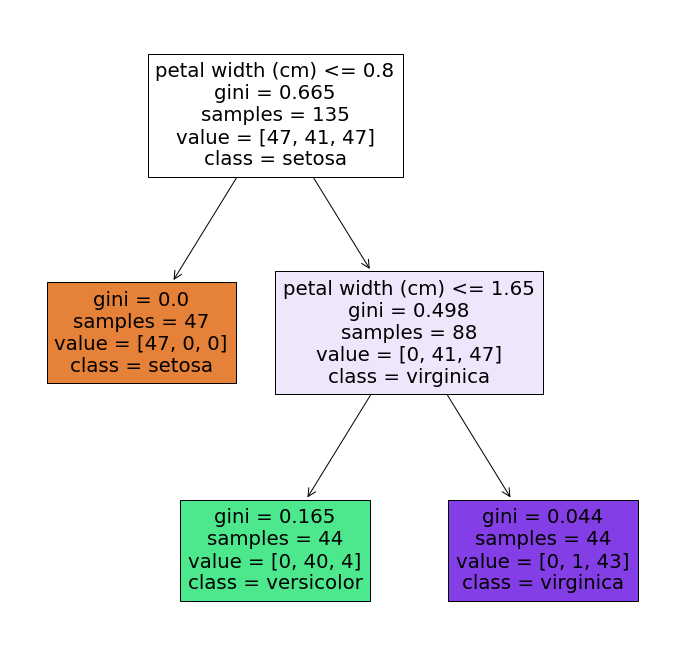

In [ ]:
#決策樹
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 12))
plot_tree(clf, 
     feature_names=iris["feature_names"], 
     filled=True,
     class_names=iris["target_names"])

In [ ]:
# 驗證
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
accuracy_score(y_test, pre)

0.9333333333333333